In [5]:
#conda install -c conda-forge ydata-profiling

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\User\anaconda3

  added / updated specs:
    - ydata-profiling


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.2.2   |       h56e8100_0         152 KB  conda-forge
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    conda-4.14.0               |   py39hcbf5309_0         1.0 MB  conda-forge
    htmlmin-0.1.12             |     pyhca7485f_2          24 KB  conda-forge
    imagehash-4.3.1            |     pyhd8ed1ab_0         294 KB  conda-forge
    multimethod-1.4            |             py_0          10 KB  conda-forge
    openssl-1.1.1l             |       h8ffe710_0         5.7 MB  conda-forge
    packaging-24.0             |     pyhd8ed1ab_0          49 KB  conda-forge
    phik-0.11.2                |     pyhd8ed1ab_0         573 KB  conda-f



==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import datetime
from ydata_profiling import ProfileReport



In [3]:
def load_demand_data():
    return pd.read_csv(Path("C:/Users/User/Documents/UNSW_Data Science 7446/ZZSC9020 Data Science Capstone Project/Data/Total Demand/totaldemand_nsw.csv"))

In [4]:
totalDemand = load_demand_data()


In [5]:
totalDemand.head()

DATETIME  TOTALDEMAND REGIONID
0  1/1/2010 0:00      8038.00     NSW1
1  1/1/2010 0:30      7809.31     NSW1
2  1/1/2010 1:00      7483.69     NSW1
3  1/1/2010 1:30      7117.23     NSW1
4  1/1/2010 2:00      6812.03     NSW1

In [6]:
totalDemand.describe()


TOTALDEMAND
count  196513.000000
mean     8113.145859
std      1299.532774
min      5074.630000
25%      7150.070000
50%      8053.230000
75%      8958.550000
max     14579.860000

In [7]:
totalDemand.shape

(196513, 3)

In [8]:
def load_temperature_data():
    return pd.read_csv(Path("C:/Users/User/Documents/UNSW_Data Science 7446/ZZSC9020 Data Science Capstone Project/Data/Temperature/temperature_nsw.csv"))

In [9]:
temperature = load_temperature_data()

In [10]:
temperature.head()

LOCATION       DATETIME  TEMPERATURE
0  Bankstown  1/1/2010 0:00         23.1
1  Bankstown  1/1/2010 0:01         23.1
2  Bankstown  1/1/2010 0:30         22.9
3  Bankstown  1/1/2010 0:50         22.7
4  Bankstown  1/1/2010 1:00         22.6

In [11]:
temperature.describe()


TEMPERATURE
count  220326.000000
mean       17.418827
std         5.849763
min        -1.300000
25%        13.400000
50%        17.700000
75%        21.300000
max        44.700000

In [12]:
temperature.shape

(220326, 3)

In [13]:
dem_temp = pd.merge(temperature, totalDemand, on = 'DATETIME', how='outer')

In [14]:
dem_temp.head()

LOCATION       DATETIME  TEMPERATURE  TOTALDEMAND REGIONID
0  Bankstown  1/1/2010 0:00         23.1      8038.00     NSW1
1  Bankstown  1/1/2010 0:01         23.1          NaN      NaN
2  Bankstown  1/1/2010 0:30         22.9      7809.31     NSW1
3  Bankstown  1/1/2010 0:50         22.7          NaN      NaN
4  Bankstown  1/1/2010 1:00         22.6      7483.69     NSW1

In [15]:
dem_temp.describe()

TEMPERATURE    TOTALDEMAND
count  220326.000000  196526.000000
mean       17.418827    8113.119994
std         5.849763    1299.510032
min        -1.300000    5074.630000
25%        13.400000    7150.060000
50%        17.700000    8053.215000
75%        21.300000    8958.550000
max        44.700000   14579.860000

In [16]:
dem_temp_inner = pd.merge(temperature, totalDemand, on = 'DATETIME')

In [17]:
dem_temp_inner.describe()

TEMPERATURE    TOTALDEMAND
count  195947.000000  195947.000000
mean       17.530995    8111.924589
std         5.884212    1299.171401
min        -1.300000    5074.630000
25%        13.500000    7149.430000
50%        17.900000    8052.180000
75%        21.500000    8956.985000
max        44.700000   14579.860000

In [18]:
dem_temp_inner.head()

LOCATION       DATETIME  TEMPERATURE  TOTALDEMAND REGIONID
0  Bankstown  1/1/2010 0:00         23.1      8038.00     NSW1
1  Bankstown  1/1/2010 0:30         22.9      7809.31     NSW1
2  Bankstown  1/1/2010 1:00         22.6      7483.69     NSW1
3  Bankstown  1/1/2010 1:30         22.5      7117.23     NSW1
4  Bankstown  1/1/2010 2:00         22.5      6812.03     NSW1

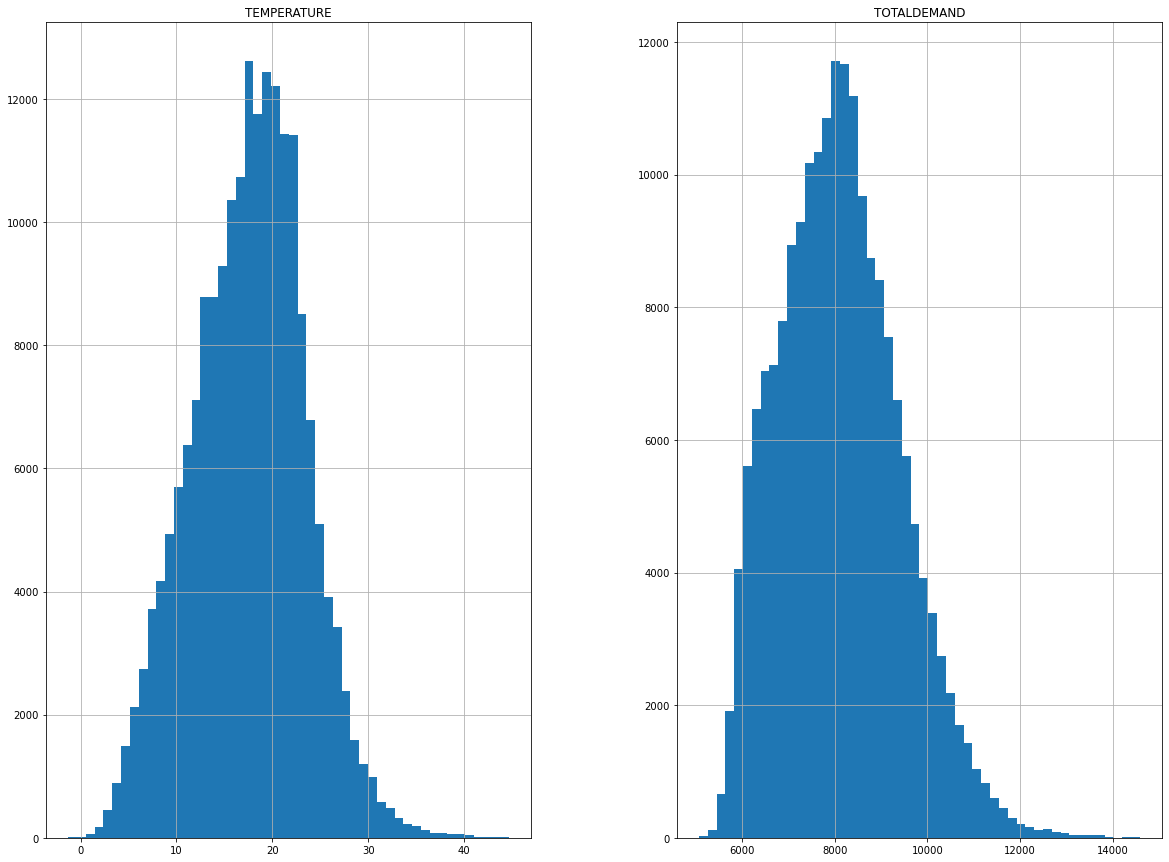

In [19]:
dem_temp_inner.hist(bins=50, figsize=(20, 15))
plt.show()


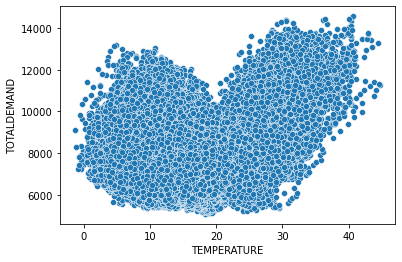

In [20]:
#sns.color_palette("Set2")
sns.scatterplot(data=dem_temp_inner, x="TEMPERATURE", y="TOTALDEMAND",  palette="pastel")
#sns.color_palette("Set2")
plt.show()

In [21]:
def load_forecast_data():
    return pd.read_csv(Path("C:/Users/User/Documents/UNSW_Data Science 7446/ZZSC9020 Data Science Capstone Project/Data/Forecast Demand/forecastdemand_sa.csv"))

In [22]:
forecastDemand = load_forecast_data()

In [23]:
forecastDemand.shape

(4095592, 6)

In [24]:
forecastDemand.head()

PREDISPATCHSEQNO REGIONID  PERIODID  FORECASTDEMAND          LASTCHANGED  \
0        2016123018      SA1        71         1394.41  2016-12-30 12:31:25   
1        2016123018      SA1        72         1285.07  2016-12-30 12:31:25   
2        2016123018      SA1        73         1221.70  2016-12-30 12:31:25   
3        2016123018      SA1        74         1141.86  2016-12-30 12:31:25   
4        2016123018      SA1        75         1087.78  2016-12-30 12:31:25   

              DATETIME  
0  2017-01-01 00:00:00  
1  2017-01-01 00:30:00  
2  2017-01-01 01:00:00  
3  2017-01-01 01:30:00  
4  2017-01-01 02:00:00

In [25]:
forecastDemand = forecastDemand[forecastDemand['REGIONID'] == 'SA1']

In [26]:
forecastDemand.shape

(4095592, 6)

In [27]:
forecastDemand.head()

PREDISPATCHSEQNO REGIONID  PERIODID  FORECASTDEMAND          LASTCHANGED  \
0        2016123018      SA1        71         1394.41  2016-12-30 12:31:25   
1        2016123018      SA1        72         1285.07  2016-12-30 12:31:25   
2        2016123018      SA1        73         1221.70  2016-12-30 12:31:25   
3        2016123018      SA1        74         1141.86  2016-12-30 12:31:25   
4        2016123018      SA1        75         1087.78  2016-12-30 12:31:25   

              DATETIME  
0  2017-01-01 00:00:00  
1  2017-01-01 00:30:00  
2  2017-01-01 01:00:00  
3  2017-01-01 01:30:00  
4  2017-01-01 02:00:00

In [28]:
forecastDemand['REGIONID'] == 'SA1'

0          True
1          True
2          True
3          True
4          True
           ... 
4095587    True
4095588    True
4095589    True
4095590    True
4095591    True
Name: REGIONID, Length: 4095592, dtype: bool

In [29]:
forecastDemand.dtypes

PREDISPATCHSEQNO      int64
REGIONID             object
PERIODID              int64
FORECASTDEMAND      float64
LASTCHANGED          object
DATETIME             object
dtype: object

In [30]:
forecastDemand['REGIONID'] == 'NSW1'

0          False
1          False
2          False
3          False
4          False
           ...  
4095587    False
4095588    False
4095589    False
4095590    False
4095591    False
Name: REGIONID, Length: 4095592, dtype: bool

In [31]:
dem_temp_inner['DATETIME'] = pd.to_datetime(dem_temp_inner['DATETIME'])

In [32]:
dem_temp_inner.dtypes

LOCATION               object
DATETIME       datetime64[ns]
TEMPERATURE           float64
TOTALDEMAND           float64
REGIONID               object
dtype: object

In [33]:
dem_temp_inner['day'] = dem_temp_inner['DATETIME'].dt.day
dem_temp_inner['month'] = dem_temp_inner['DATETIME'].dt.month
dem_temp_inner['year'] = dem_temp_inner['DATETIME'].dt.year
dem_temp_inner['hour'] = dem_temp_inner['DATETIME'].dt.hour
dem_temp_inner['date'] = dem_temp_inner['DATETIME'].dt.date
dem_temp_inner['weekday'] = dem_temp_inner['DATETIME'].dt.weekday
dem_temp_inner['day_name'] = dem_temp_inner['DATETIME'].dt.day_name()
#dem_temp_inner['date + hour'] = str(dem_temp_inner['DATETIME'].dt.date) + str(dem_temp_inner['DATETIME'].dt.hour)

In [34]:
dem_temp_inner.head()

LOCATION            DATETIME  TEMPERATURE  TOTALDEMAND REGIONID  day  \
0  Bankstown 2010-01-01 00:00:00         23.1      8038.00     NSW1    1   
1  Bankstown 2010-01-01 00:30:00         22.9      7809.31     NSW1    1   
2  Bankstown 2010-01-01 01:00:00         22.6      7483.69     NSW1    1   
3  Bankstown 2010-01-01 01:30:00         22.5      7117.23     NSW1    1   
4  Bankstown 2010-01-01 02:00:00         22.5      6812.03     NSW1    1   

   month  year  hour        date  weekday day_name  
0      1  2010     0  2010-01-01        4   Friday  
1      1  2010     0  2010-01-01        4   Friday  
2      1  2010     1  2010-01-01        4   Friday  
3      1  2010     1  2010-01-01        4   Friday  
4      1  2010     2  2010-01-01        4   Friday

In [35]:
grouped_hour = dem_temp_inner.groupby('hour')

In [36]:
grouped_hour.head()

LOCATION            DATETIME  TEMPERATURE  TOTALDEMAND REGIONID  day  \
0    Bankstown 2010-01-01 00:00:00         23.1      8038.00     NSW1    1   
1    Bankstown 2010-01-01 00:30:00         22.9      7809.31     NSW1    1   
2    Bankstown 2010-01-01 01:00:00         22.6      7483.69     NSW1    1   
3    Bankstown 2010-01-01 01:30:00         22.5      7117.23     NSW1    1   
4    Bankstown 2010-01-01 02:00:00         22.5      6812.03     NSW1    1   
..         ...                 ...          ...          ...      ...  ...   
134  Bankstown 2010-03-01 19:00:00         19.7      7878.88     NSW1    1   
136  Bankstown 2010-03-01 20:00:00         19.5      7995.93     NSW1    1   
138  Bankstown 2010-03-01 21:00:00         19.0      7642.16     NSW1    1   
140  Bankstown 2010-03-01 22:00:00         19.2      7528.43     NSW1    1   
142  Bankstown 2010-03-01 23:00:00         18.5      7226.84     NSW1    1   

     month  year  hour        date  weekday day_name  
0        1  2010     0  2010-01-01        4   Friday  
1        1  2010     0  2010-01-01        4   Friday  
2        1  2010     1  2010-01-01        4   Friday  
3        1  2010     1  2010-01-01        4   Friday  
4        1  2010     2  2010-01-01        4   Friday  
..     ...   ...   ...         ...      ...      ...  
134      3  2010    19  2010-03-01        0   Monday  
136      3  2010    20  2010-03-01        0   Monday  
138      3  2010    21  2010-03-01        0   Monday  
140      3  2010    22  2010-03-01        0   Monday  
142      3  2010    23  2010-03-01        0   Monday  

[120 rows x 12 columns]

In [37]:
dem_temp_inner.groupby([dem_temp_inner["DATETIME"].dt.date])["TEMPERATURE", "TOTALDEMAND"].mean()


C:\Users\User\AppData\Local\Temp/ipykernel_31096/3631973381.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dem_temp_inner.groupby([dem_temp_inner["DATETIME"].dt.date])["TEMPERATURE", "TOTALDEMAND"].mean()


TEMPERATURE  TOTALDEMAND
DATETIME                            
2010-01-01    25.185417  7801.352917
2010-01-02    24.461702  9557.546383
2010-01-03    18.737500  8560.798958
2010-01-04    19.191489  8499.952553
2010-01-05    15.912821  8025.070256
...                 ...          ...
2021-11-02    21.970833  7562.555417
2021-11-03    22.175000  7841.899792
2021-12-01    23.850000  8058.727083
2021-12-02    24.556250  8055.056250
2021-12-03    22.650000  7846.094375

[4092 rows x 2 columns]

<AxesSubplot:xlabel='DATETIME'>

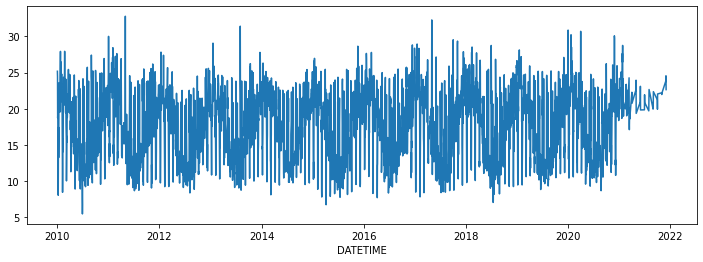

In [38]:
fig, axs = plt.subplots(figsize=(12, 4))

dem_temp_inner.groupby([dem_temp_inner["DATETIME"].dt.date])["TEMPERATURE"].mean().plot(
    kind='line', rot=0, ax=axs
)

<AxesSubplot:xlabel='DATETIME'>

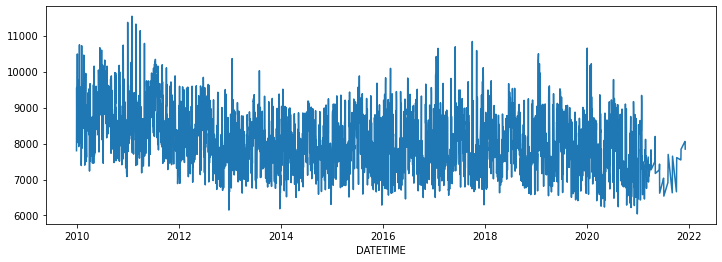

In [39]:
fig, axs = plt.subplots(figsize=(12, 4))

dem_temp_inner.groupby([dem_temp_inner["DATETIME"].dt.date])["TOTALDEMAND"].mean().plot(
    kind='line', rot=0, ax=axs
)

C:\Users\User\AppData\Local\Temp/ipykernel_31096/1830846331.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dem_temp_inner.groupby([dem_temp_inner["DATETIME"].dt.date])["TEMPERATURE", "TOTALDEMAND"].mean().plot(


<AxesSubplot:xlabel='DATETIME'>

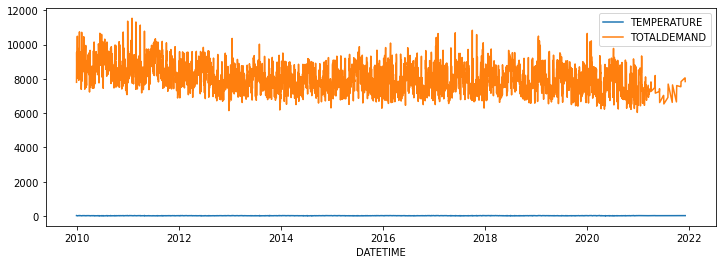

In [40]:
fig, axs = plt.subplots(figsize=(12, 4))

dem_temp_inner.groupby([dem_temp_inner["DATETIME"].dt.date])["TEMPERATURE", "TOTALDEMAND"].mean().plot(
    kind='line', rot=0, ax=axs
)

<AxesSubplot:xlabel='DATETIME'>

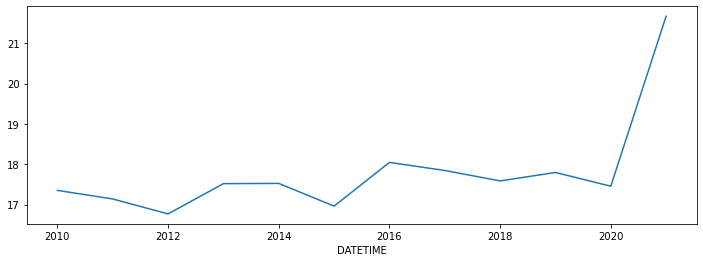

In [41]:
fig, axs = plt.subplots(figsize=(12, 4))

dem_temp_inner.groupby([dem_temp_inner["DATETIME"].dt.year])["TEMPERATURE"].mean().plot(
    kind='line', rot=0, ax=axs
)

<AxesSubplot:xlabel='DATETIME'>

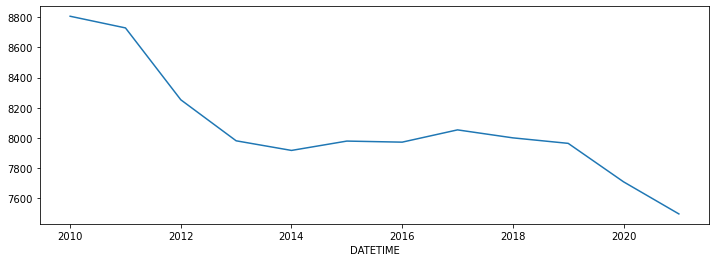

In [42]:
fig, axs = plt.subplots(figsize=(12, 4))

dem_temp_inner.groupby([dem_temp_inner["DATETIME"].dt.year])["TOTALDEMAND"].mean().plot(
    kind='line', rot=0, ax=axs
)

<AxesSubplot:xlabel='DATETIME'>

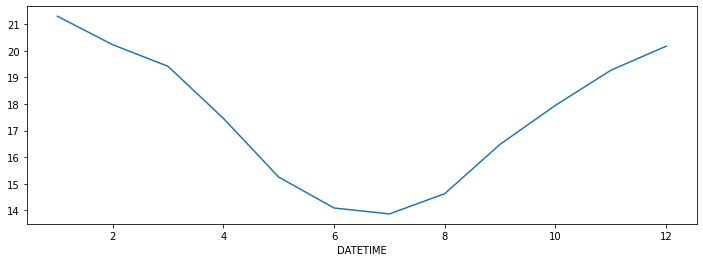

In [43]:
fig, axs = plt.subplots(figsize=(12, 4))

dem_temp_inner.groupby([dem_temp_inner["DATETIME"].dt.month])["TEMPERATURE"].mean().plot(
    kind='line', rot=0, ax=axs
)

<AxesSubplot:xlabel='DATETIME'>

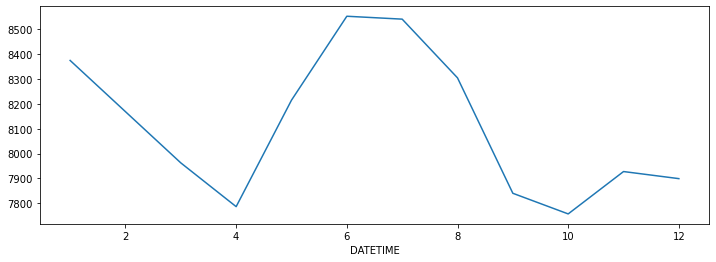

In [44]:
fig, axs = plt.subplots(figsize=(12, 4))

dem_temp_inner.groupby([dem_temp_inner["DATETIME"].dt.month])["TOTALDEMAND"].mean().plot(
    kind='line', rot=0, ax=axs
)

In [45]:
dem_temp_inner.groupby([dem_temp_inner["DATETIME"].dt.year])["TEMPERATURE", "TOTALDEMAND"].mean()

C:\Users\User\AppData\Local\Temp/ipykernel_31096/2177233042.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dem_temp_inner.groupby([dem_temp_inner["DATETIME"].dt.year])["TEMPERATURE", "TOTALDEMAND"].mean()


TEMPERATURE  TOTALDEMAND
DATETIME                          
2010        17.350959  8806.634881
2011        17.137916  8729.258601
2012        16.767150  8253.115030
2013        17.518075  7981.460353
2014        17.524010  7917.697750
2015        16.960325  7979.624178
2016        18.044215  7972.542419
2017        17.844709  8053.839384
2018        17.585447  8001.012442
2019        17.794789  7964.534511
2020        17.454181  7709.863122
2021        21.669910  7497.118816

In [46]:
dem_temp_inner.groupby([dem_temp_inner["DATETIME"].dt.year])["TEMPERATURE", "TOTALDEMAND"].median()

C:\Users\User\AppData\Local\Temp/ipykernel_31096/1716735715.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dem_temp_inner.groupby([dem_temp_inner["DATETIME"].dt.year])["TEMPERATURE", "TOTALDEMAND"].median()


TEMPERATURE  TOTALDEMAND
DATETIME                          
2010             17.4     8924.210
2011             17.1     8810.075
2012             17.3     8317.960
2013             17.7     8044.295
2014             18.1     7984.690
2015             17.3     7990.315
2016             18.3     7933.990
2017             18.3     7960.675
2018             18.0     7947.570
2019             18.2     7814.980
2020             17.6     7522.500
2021             21.2     7444.600

In [47]:
dem_temp_inner.groupby([dem_temp_inner["DATETIME"].dt.year])["TEMPERATURE", "TOTALDEMAND"].count()

C:\Users\User\AppData\Local\Temp/ipykernel_31096/957029924.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dem_temp_inner.groupby([dem_temp_inner["DATETIME"].dt.year])["TEMPERATURE", "TOTALDEMAND"].count()


TEMPERATURE  TOTALDEMAND
DATETIME                          
2010            17259        17259
2011            17502        17502
2012            17534        17534
2013            17516        17516
2014            17518        17518
2015            17520        17520
2016            17347        17347
2017            17520        17520
2018            17495        17495
2019            17520        17520
2020            17567        17567
2021             3649         3649

In [48]:
dem_temp_inner.groupby([dem_temp_inner["DATETIME"].dt.month])["TEMPERATURE", "TOTALDEMAND"].count()

C:\Users\User\AppData\Local\Temp/ipykernel_31096/3244586078.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dem_temp_inner.groupby([dem_temp_inner["DATETIME"].dt.month])["TEMPERATURE", "TOTALDEMAND"].count()


TEMPERATURE  TOTALDEMAND
DATETIME                          
1               17410        17410
2               15810        15810
3               16707        16707
4               15940        15940
5               16457        16457
6               15939        15939
7               16305        16305
8               16492        16492
9               15974        15974
10              16474        16474
11              15952        15952
12              16487        16487

In [49]:
dem_temp_inner.groupby([dem_temp_inner["DATETIME"].dt.day])["TEMPERATURE", "TOTALDEMAND"].count()

C:\Users\User\AppData\Local\Temp/ipykernel_31096/642510376.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dem_temp_inner.groupby([dem_temp_inner["DATETIME"].dt.day])["TEMPERATURE", "TOTALDEMAND"].count()


TEMPERATURE  TOTALDEMAND
DATETIME                          
1                6915         6915
2                6903         6903
3                6863         6863
4                6324         6324
5                6297         6297
6                6335         6335
7                6326         6326
8                6325         6325
9                6324         6324
10               6338         6338
11               6336         6336
12               6336         6336
13               6473         6473
14               6471         6471
15               6456         6456
16               6417         6417
17               6402         6402
18               6375         6375
19               6400         6400
20               6401         6401
21               6388         6388
22               6418         6418
23               6420         6420
24               6424         6424
25               6425         6425
26               6421         6421
27               6425         6425
28               6430         6430
29               5993         5993
30               5842         5842
31               3744         3744

In [50]:
dem_temp_inner.groupby([dem_temp_inner["DATETIME"].dt.day_name()])["TEMPERATURE", "TOTALDEMAND"].count()

C:\Users\User\AppData\Local\Temp/ipykernel_31096/1276558396.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dem_temp_inner.groupby([dem_temp_inner["DATETIME"].dt.day_name()])["TEMPERATURE", "TOTALDEMAND"].count()


TEMPERATURE  TOTALDEMAND
DATETIME                           
Friday           28017        28017
Monday           27900        27900
Saturday         28025        28025
Sunday           28007        28007
Thursday         27959        27959
Tuesday          27955        27955
Wednesday        28084        28084

In [51]:
dem_temp_inner.groupby([dem_temp_inner["DATETIME"].dt.day_name()])["TEMPERATURE", "TOTALDEMAND"].mean()

C:\Users\User\AppData\Local\Temp/ipykernel_31096/1715638386.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dem_temp_inner.groupby([dem_temp_inner["DATETIME"].dt.day_name()])["TEMPERATURE", "TOTALDEMAND"].mean()


TEMPERATURE  TOTALDEMAND
DATETIME                           
Friday       17.560042  8210.423389
Monday       17.361957  8214.550773
Saturday     17.507001  7843.580903
Sunday       17.602646  7753.571994
Thursday     17.660052  8283.164466
Tuesday      17.436580  8239.441757
Wednesday    17.587933  8239.447850

<AxesSubplot:xlabel='DATETIME'>

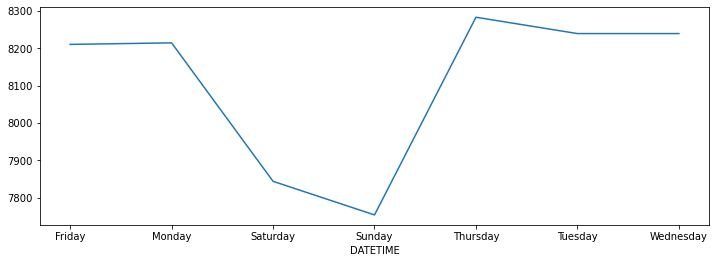

In [52]:
fig, axs = plt.subplots(figsize=(12, 4))

dem_temp_inner.groupby([dem_temp_inner["DATETIME"].dt.day_name()])["TOTALDEMAND"].mean().plot(
    kind='line', rot=0, ax=axs
)

<AxesSubplot:xlabel='DATETIME'>

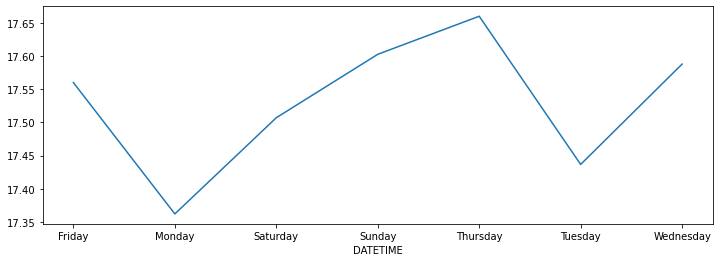

In [53]:
fig, axs = plt.subplots(figsize=(12, 4))

dem_temp_inner.groupby([dem_temp_inner["DATETIME"].dt.day_name()])["TEMPERATURE"].mean().plot(
    kind='line', rot=0, ax=axs
)

In [54]:
dem_temp_inner.groupby(['year', 'month'])["TEMPERATURE", "TOTALDEMAND"].mean()

C:\Users\User\AppData\Local\Temp/ipykernel_31096/466426145.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dem_temp_inner.groupby(['year', 'month'])["TEMPERATURE", "TOTALDEMAND"].mean()


TEMPERATURE  TOTALDEMAND
year month                          
2010 1        20.868008  8941.450389
     2        20.218907  8855.467677
     3        19.828286  8698.725127
     4        17.593856  8452.863411
     5        15.323485  8897.770510
...                 ...          ...
2021 8        21.104167  7368.353056
     9        20.999306  7229.393819
     10       21.084722  7209.823194
     11       22.118056  7649.492569
     12       23.685417  7986.625903

[144 rows x 2 columns]

<AxesSubplot:xlabel='year,month'>

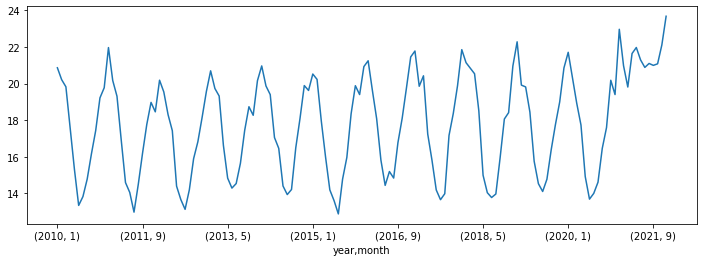

In [55]:
fig, axs = plt.subplots(figsize=(12, 4))

dem_temp_inner.groupby(['year', 'month'])["TEMPERATURE"].mean().plot(
    kind='line', rot=0, ax=axs
)

In [56]:
dem_temp_inner.groupby(['year', 'month'])["TEMPERATURE", "TOTALDEMAND"].count()

C:\Users\User\AppData\Local\Temp/ipykernel_31096/2423580948.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dem_temp_inner.groupby(['year', 'month'])["TEMPERATURE", "TOTALDEMAND"].count()


TEMPERATURE  TOTALDEMAND
year month                          
2010 1             1466         1466
     2             1317         1317
     3             1453         1453
     4             1416         1416
     5             1452         1452
...                 ...          ...
2021 8              144          144
     9              144          144
     10             144          144
     11             144          144
     12             144          144

[144 rows x 2 columns]

In [57]:
profile = ProfileReport(dem_temp_inner, title="Pandas Profiling Report")

In [58]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [59]:
dem_temp_inner.groupby(['year','month'])["TEMPERATURE", "TOTALDEMAND"].mean()

C:\Users\User\AppData\Local\Temp/ipykernel_31096/384329966.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dem_temp_inner.groupby(['year','month'])["TEMPERATURE", "TOTALDEMAND"].mean()


TEMPERATURE  TOTALDEMAND
year month                          
2010 1        20.868008  8941.450389
     2        20.218907  8855.467677
     3        19.828286  8698.725127
     4        17.593856  8452.863411
     5        15.323485  8897.770510
...                 ...          ...
2021 8        21.104167  7368.353056
     9        20.999306  7229.393819
     10       21.084722  7209.823194
     11       22.118056  7649.492569
     12       23.685417  7986.625903

[144 rows x 2 columns]

In [60]:
dem_temp_inner.groupby(['year','month'])["TEMPERATURE"].min()

year  month
2010  1         1.6
      2         3.2
      3         6.3
      4         6.5
      5         3.1
               ... 
2021  8        16.9
      9        14.2
      10       14.8
      11       15.7
      12       16.1
Name: TEMPERATURE, Length: 144, dtype: float64

In [61]:
dem_temp_inner.groupby(['year','month'])["TEMPERATURE"].max()

year  month
2010  1        41.1
      2        35.4
      3        34.7
      4        29.9
      5        28.4
               ... 
2021  8        30.7
      9        27.5
      10       26.9
      11       27.3
      12       33.5
Name: TEMPERATURE, Length: 144, dtype: float64

In [63]:
temp_dem =dem_temp_inner.groupby(['year', 'month'])["TEMPERATURE", "TOTALDEMAND"].mean()

C:\Users\User\AppData\Local\Temp/ipykernel_31096/382141632.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp_dem =dem_temp_inner.groupby(['year', 'month'])["TEMPERATURE", "TOTALDEMAND"].mean()


In [65]:
temp_dem.to_csv('C:/Users/User/Documents/UNSW_Data Science 7446/ZZSC9020 Data Science Capstone Project/Data/temp_dem.csv', index=False)